<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-03-2020.csv')
                 

In [15]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2347 non-null   float64
 1   Admin2          2361 non-null   object 
 2   Province_State  2448 non-null   object 
 3   Country_Region  2625 non-null   object 
 4   Last_Update     2625 non-null   object 
 5   Lat             2574 non-null   float64
 6   Long_           2574 non-null   float64
 7   Confirmed       2625 non-null   int64  
 8   Deaths          2625 non-null   int64  
 9   Recovered       2625 non-null   int64  
 10  Active          2625 non-null   int64  
 11  Combined_Key    2625 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 246.2+ KB


In [16]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2347.000000,2574.000000,2574.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,30890.724329,36.381705,-79.327771,417.492190,22.395048,86.017524,206.651048
std,17108.467816,10.261907,42.621789,4603.284363,402.927774,1592.894161,2966.039756
min,66.000000,-42.882100,-159.596679,0.000000,0.000000,0.000000,0.000000
25%,18048.000000,33.555222,-95.150669,2.000000,0.000000,0.000000,0.000000
50%,29097.000000,37.743499,-86.584788,8.000000,0.000000,0.000000,0.000000
75%,45078.000000,41.487650,-80.239812,40.000000,1.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,119827.000000,14681.000000,63612.000000,85388.000000


In [17]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  181


In [18]:
#Combining China and Mainland China cases
df['Country_Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country_Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['US', 'Canada', 'United Kingdom', 'China', 'Netherlands', 'Australia', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

In [19]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country_Region
Number_of_countries = len(df['Country_Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country_Region')['Confirmed','Deaths'].sum())
cases['Country_Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]


dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Confirmed,Deaths
Country_Region,,
Italy,119827,14681
Spain,119199,11198
US,275586,7087
France,65202,6520
United Kingdom,38689,3611
China,82511,3326
Iran,53183,3294
Netherlands,15821,1490
Germany,91159,1275


In [20]:
dfglobal = pd.read_csv("today.csv")
dfglobal['Death_Percent'] = round((dfglobal['Deaths'] / dfglobal['Confirmed']) *100,2)
dfglobal = dfglobal.sort_values(by = ['Death_Percent'], ascending = False)
dfglobal.head(10)


,Country_Region,Confirmed,Deaths,Death_Percent
119,Botswana,4,1,25.00
105,Angola,8,2,25.00
129,Gambia,4,1,25.00
107,MS Zaandam,9,2,22.22
132,Nicaragua,5,1,20.00
108,Sudan,10,2,20.00
95,Guyana,23,4,17.39
120,Cabo Verde,6,1,16.67
130,Mauritania,6,1,16.67
104,Syria,16,2,12.50


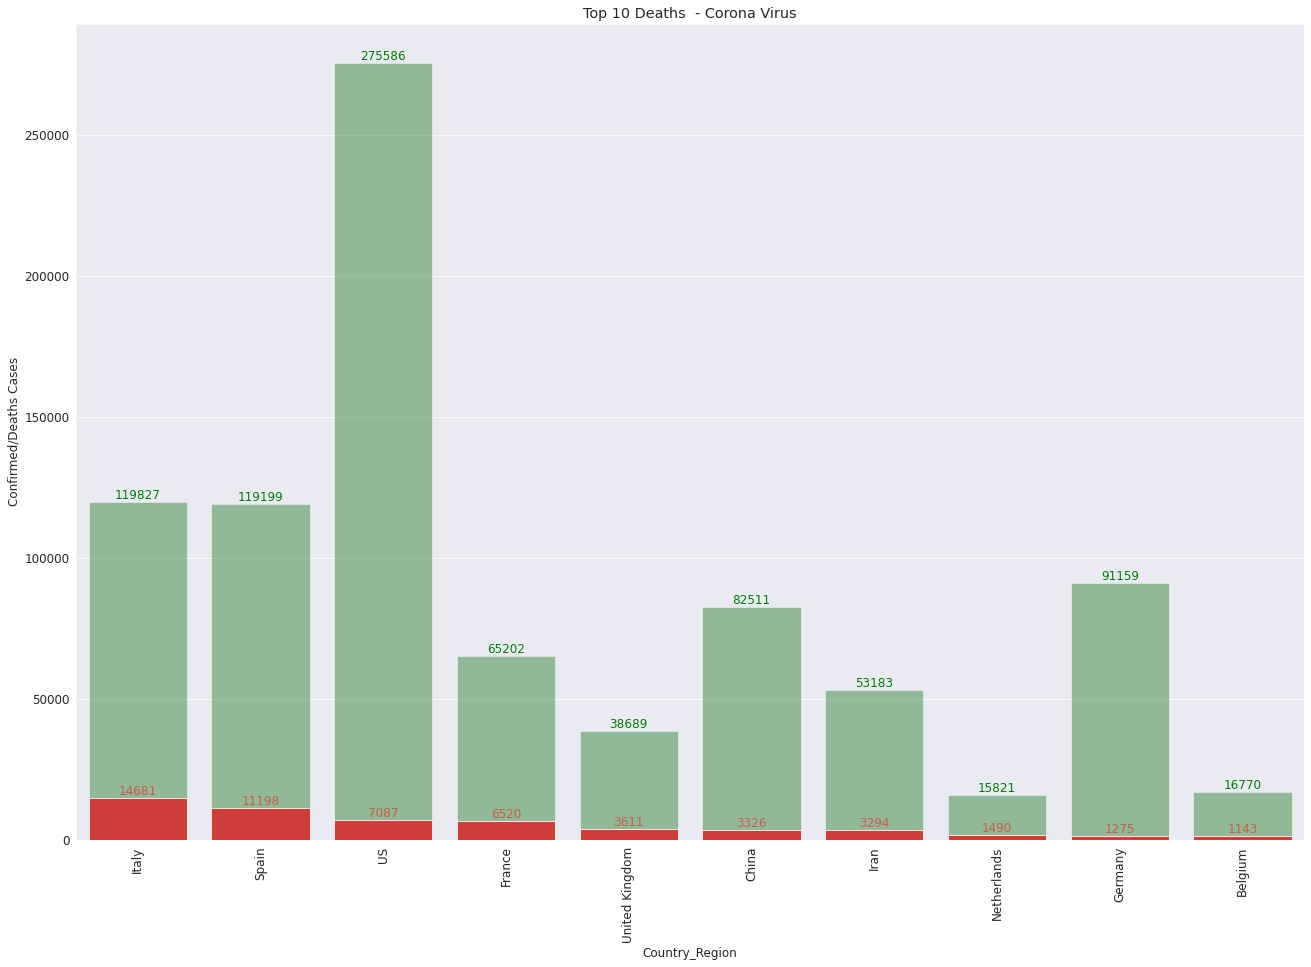

In [11]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(11,200))

g =sns.barplot(x='Country_Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country_Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top 10 Deaths  - Corona Virus')
g.set_xticklabels(dfglobal['Country_Region'], rotation='vertical', fontsize=12)
plt.show()


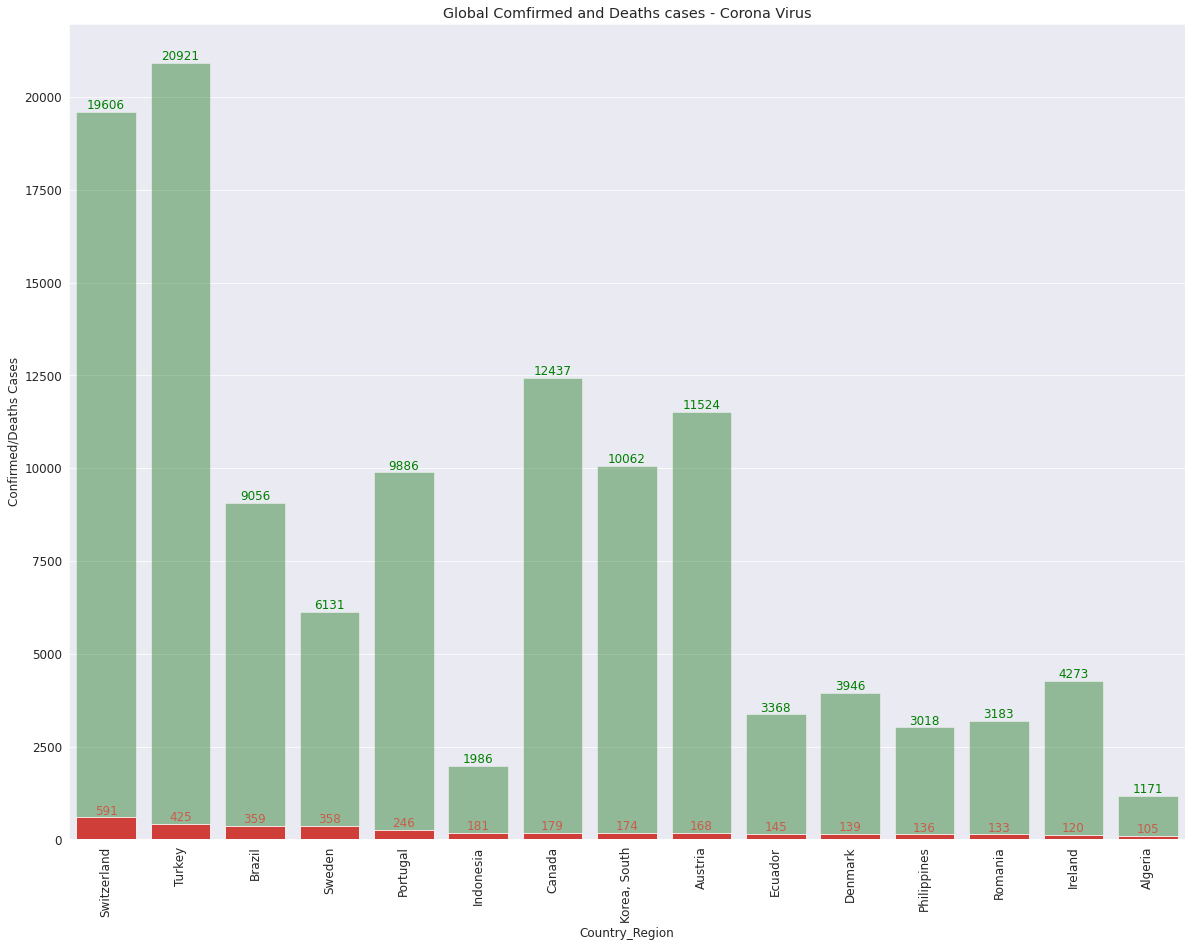

In [12]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,11)
nbr_rows_to_read = 15
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country_Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country_Region',y='Deaths', color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')
    
    
plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country_Region'], rotation='vertical', fontsize=12)
plt.show()

